# Akhilesh Pai #

# PHAS0029 Session 2:  Histograms and normal distributions

<p><b>Intended learning outcomes:</b> </p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</ul>


The task for this session is a "fill-in-the-blanks" style task. This notebook will guide you through what you need to do, and at various points you will find empty code cells that you need to complete in order to proceed.

<div class="alert alert-success"> <p>

<b>Instructions to you</b> are in green boxes like this one.

First of all, rename this notebook so that the title contains your name; when you have completed the task you will upload this notebook to Moodle.
</div>


## Getting started: Importing the data

The first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience.

In [1]:
# The following line makes all plot output generate as images within the notebook. 
# This command should precede the import pyplot line
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# See the discussion below for when you might want to uncomment this line.
plt.rcParams["patch.force_edgecolor"] = True

<div class="alert alert-success"> 
We're going to import some data from a text file into an array using numpy's loadtxt function. 

Make sure you've downloaded the file "sampledata.txt" from Moodle, and that it is saved in the <b>same directory/folder as this notebook</b>. 

The file contains a single column of numbers representing the results of a series of measurements of the same quantity. 

Use `np.loadtxt` to import the contents of the file into an array called "`data`". 

To check that the file has imported correctly, output the array, and also the number of data points. 


Do this in the cell below:
</div>

In [2]:
data = np.loadtxt("sampledata.txt") # loads sample data and assigns to "data"
print(data)
print("\nThere are",len(data), "data points")

[ 9.08784134 10.10662555 10.6043289   8.14670094 11.21532998 10.09371284
 10.4268221   9.512998    8.62930223  7.48937559 10.65366662 10.82957068
  8.78448663 10.9601158   9.90659032  9.1582816  10.44614588  8.83495279
 11.08507526 10.74786111 10.3768063   9.94925924 10.98840191  8.1845716
 11.11626203  9.93193642  8.24589252  9.60070141  9.59625026  8.75870124
 10.26599281 10.03072825  9.17414148 10.95249503  9.81645277  7.87208683
  9.59434022  9.22794451  8.60092591 11.04193271 10.55787516  9.75736188
  9.96894073 10.35909125  9.08197603  9.60704288 11.83643996 10.65500473
  9.55931389 11.79449148 11.52681481 11.22729724 10.86988402  9.84875052
 10.05911294 10.2443348   9.78448166 10.18996261  8.85726152 11.40313014
  9.30652172 10.15578731 10.89652947  9.37932207  9.60507078 10.38731808
  8.91990775  9.15388917 10.91798911  8.96221918  8.03327801 10.45508301
  7.76131074 10.03609924  9.5262954   9.14885299 10.25739095  9.89103726
  8.63909939 10.36168981  9.92134822 10.00209711 11.

If you've successfully imported the data, you should be able to see that the average value is around 10. We can easily calculate the average:

In [3]:
print("The mean of the data is ", np.mean(data))

The mean of the data is  9.793228122766692


### Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

<IPython.core.display.Javascript object>


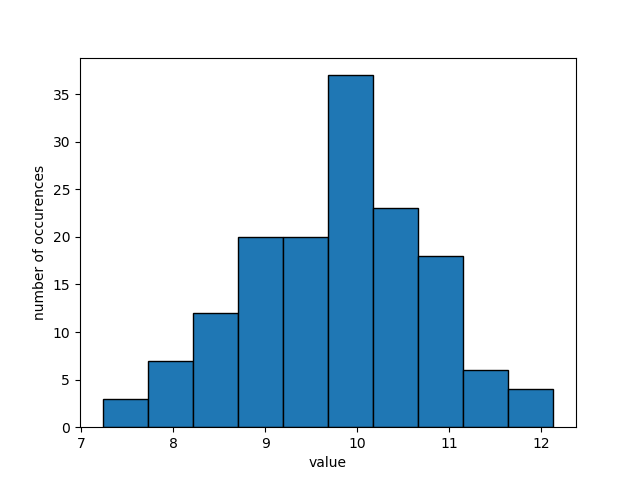

In [4]:
plt.figure()

plt.hist(data)

plt.xlabel("value")
plt.ylabel("number of occurences");

However, it's often useful to be able to see the outline of the histogram bins, which is turned off by default in Matplotlib 2. You can do this in one of two ways:

<IPython.core.display.Javascript object>


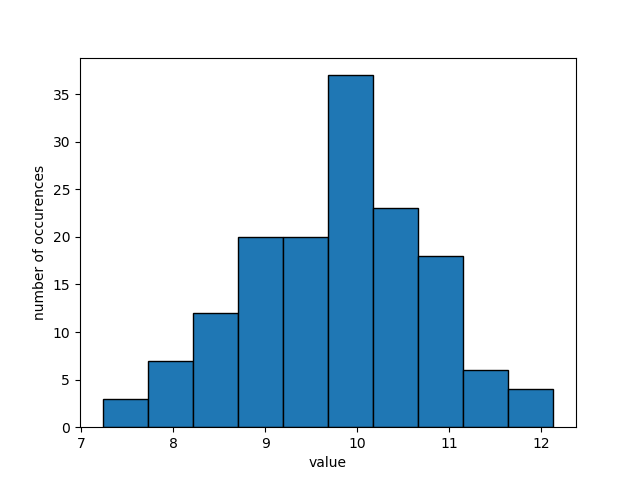

In [5]:
# 1. Include borders explicitly in the plt.hist statement:

plt.figure()
plt.hist(data, edgecolor='black') # you can set the edgecolor to anything, black is probably best
plt.xlabel("value")
plt.ylabel("number of occurences");

# 2. The following line will globally include borders in all plt.hist (and other bar-type plots) - 
# most useful if you include it in the preamble cell with the import statements 

#plt.rcParams["patch.force_edgecolor"] = True

# Which one you choose to use is up to you!

By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised - in this case the integral of the histogram will be equal to 1. To use this, set the keyword argument `density=True`.

For example, this will sort the data into 15 bins, and normalize the histogram:

<IPython.core.display.Javascript object>


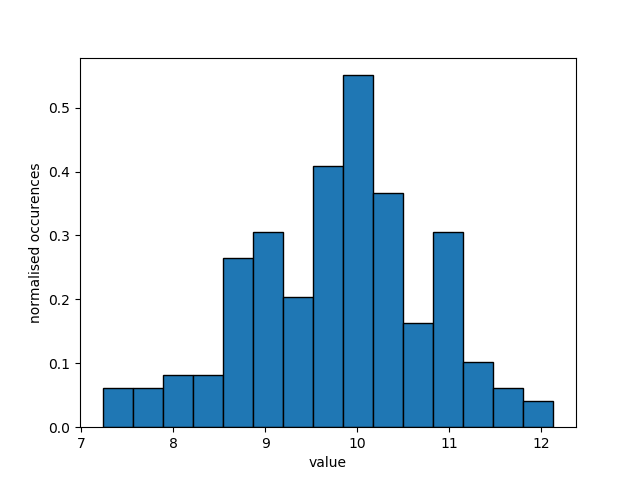

In [6]:
plt.figure()
# 15 bins, normalized:
plt.hist(data,bins=15,density=True,edgecolor='k') # 'k' as abbreviation for black.

plt.xlabel("value")
plt.ylabel("normalised occurences") ; # semicolon at end suppresses unwanted IPython <output>

### How well does this fit to a Gaussian?

Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: `scipy.stats`, to find out. (Documentation link: https://docs.scipy.org/doc/scipy/reference/stats.html )

In [7]:
import scipy.stats as stats

Specifically, we'll use `norm.fit` to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [8]:
x0, sigma = stats.norm.fit(data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)

Fitted Gaussian: 
 Mean value  9.793228122766692 with standard deviation 0.97432217875081


We can see that we obtain the same mean as we got before from `np.mean()`.



<div class="alert alert-success"> 
Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is.<br> 

In the cell below, write a suitably-named function that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.

Don't forget the docstring!
</div>

In [9]:
def gaussian_fn(x, x0, sigma): # defines Gaussian equation as function
    """
    Calculates the y coordinates from given mean, standard deviation and x values.
    Input: x (x-values), x0 (mean), sigma (standard deviation)
    Output: y (Gaussian y-values)
    """
    a = 1/(sigma*np.sqrt(2*np.pi)) # first part of equation
    b = (-((x-x0)**2)/(2*sigma**2)) # inside exponential
    c = np.exp(b) # exponential
    y = a*c # calculation of y
    return y

<div class="alert alert-success"> 
Now complete the cell below to:
<ol>
<li>use np.linspace to create an array of 100 x-values for the fitted line starting at 7 and finishing at 13</li>
    <li>Use your function to create a corresponding array of y-values with a Gaussian form.</li>
</ol>
</div>

In [10]:
x = np.linspace(7, 13, 100) # creates array of 100 equally spaced points between 7 and 13
y = gaussian_fn(x, x0, sigma) # calculates y-values for x using Gaussian function

The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

<IPython.core.display.Javascript object>


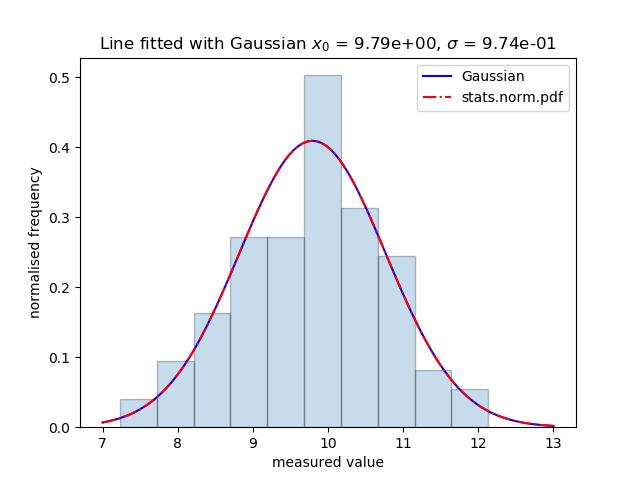

In [11]:
gaussian_check = stats.norm.pdf(x,x0,sigma) # see next text cell for explanation

plt.figure()
plt.hist(data, density=True,alpha=0.25,edgecolor='k')
plt.plot(x,y,'b-', label='Gaussian')
plt.plot(x,gaussian_check,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line). If it doesn't, go back and correct your `gaussian_fn` code until it does!

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

Note also:
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent, which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram, or overlaying two histograms.
2. The title of the graph includes the fitted parameters by using a Python `.format`. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.


### More data = a better fit?

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "random" will generate random numbers with a normal distribution for us.

In [12]:
npoints = 10000 # the number of data points we want
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = np.random.normal(mean_x,stdev,npoints)

<div class="alert alert-success"> 

In the cell below, 
<ol>

<li>Use stats.norm.fit() to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1? Use a text cell to comment on this.</li>
<li>Use stats.norm.pdf() to generate a set of y-values (use the set of x-values you generated with `np.linspace()` in cell 10)</li>
<li>Plot a histogram of the data, with the fitted line on top (just as above).</li>
<li> Experiment with the number of points, `npoints` in the cell above.</li>
<li>Experiment with the number of bins. Do more bins always give better results?</li>
<li><b>Use further text and code cells to demonstrate your results for two or three different scenarios</b> (i.e. vary the bin ranges and/or the number of data points).</li>
<li>Make sure all your plots are labelled (either on the plot itself or in `print()` outputs) with:
    <ul>
    <li>the number of datapoints;</li>
    <li>the number of bins; </li>
    <li>the values of $x_0$ and $\sigma$,</li>
    </ul>
    for each dataset.</li>
</ol>
</div>

## Original Plot ##

In [13]:
x_bar, sd = stats.norm.fit(new_data) # mean and standard deviation of new_data
print("The actual mean is:",x_bar,"\nThe actual standard deviation is:", sd)

The actual mean is: 10.002024824394752 
The actual standard deviation is: 0.9913551629292905


<IPython.core.display.Javascript object>


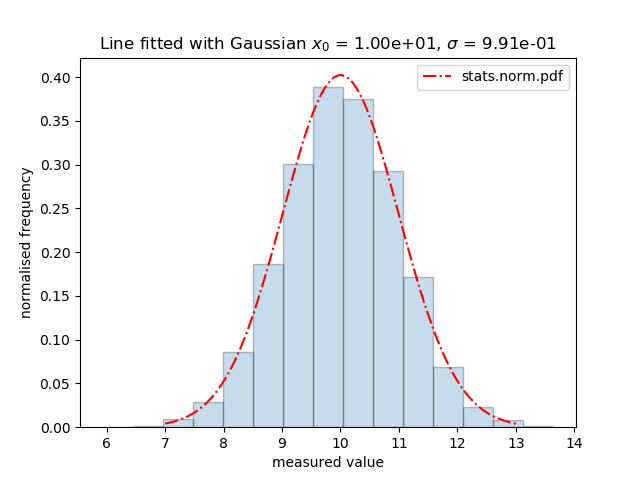

Number of points: 10000 
Number of bins: 15 
Mean: 10.002024824394752 
Standard Deviation: 0.9913551629292905


In [14]:
y_values = stats.norm.pdf(x, x_bar, sd) # y values for x, using new mean and standard deviation

plt.figure() # plots new graph
plt.hist(new_data, bins=15, density=True,alpha=0.25,edgecolor='k') # creates a histogram for new_data
plt.plot(x,y_values,'r-.', label="stats.norm.pdf") # plots fitted Gaussian
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
plt.title('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x_bar, sd))
print("Number of points:", npoints,"\nNumber of bins:", 15,"\nMean:", x_bar,"\nStandard Deviation:", sd)

As can be seen in the code cell above, I have used the "stats.norm.fit" function to find the mean and standard deviation of "new_data" that has been generated. I have assigned the mean to "x_bar" and the standard deviation to "sd" for later use. I have then used the "stats.norm.pdf" function to generate an array of y values to be plotted, using the newly calculated mean and standard deviation from the "new_data", which has been labelled "y_values".

Sunsequently, the x and y values are plotted on the graph on top of the histogram for the "new_data".

The values of the actual mean and standard deviation are not exactly equal to 10 and 1, however they are very close to 10 and 1. Even after the "new_data" generates a new set of data, the mean and standard deviation remain very close to 10 and 1 respectively.

## Number of Points Decreased to 100 ##

<IPython.core.display.Javascript object>


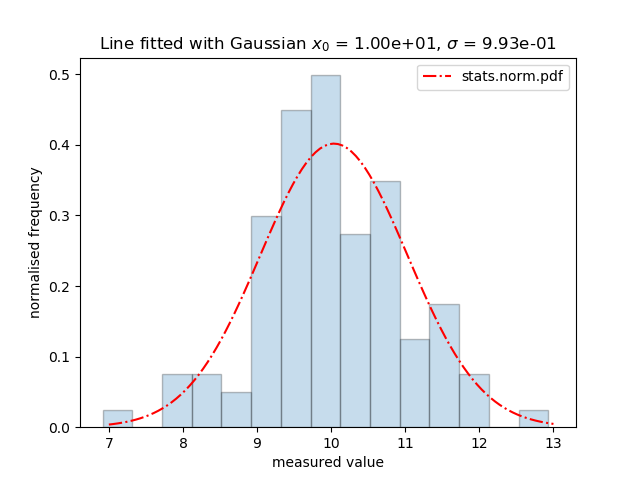

Number of points: 100 
Number of bins: 15 
Mean: 10.036612684728972 
Standard Deviation: 0.9928226220688436


In [15]:
npoints1 = 100 # data points from 10000 to 100

new_data1 = np.random.normal(mean_x,stdev,npoints1) # new data generated for new npoints

x_bar1, sd1 = stats.norm.fit(new_data1) # new mean and standard deviation

y_values1 = stats.norm.pdf(x, x_bar1, sd1)

plt.figure()
plt.hist(new_data1, bins=15, density=True,alpha=0.25,edgecolor='k') # plots new data with new number of points
plt.plot(x,y_values1,'r-.', label="stats.norm.pdf") # plots new Gaussian line with new y values
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
plt.title('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x_bar1, sd1))
print("Number of points:", npoints1,"\nNumber of bins:", 15,"\nMean:", x_bar1,"\nStandard Deviation:", sd1)

In the code cell above, the number of points has been changed from 10,000 to 100. The "npoints" has been labelled as "npoints1" to distinguish it from the previous "npoints". As you can see from the plot, by decreasing the number of data points by a factor of 100, there are greater differences between the heights of the bins and the fitted Gaussian line. Whereas with the previous plot in which there are 10,000 data points, the difference between the heights of the bins and the fitted Gaussian is minimal. The histogram, though less accurate, generally does fit the plotted Gaussian line.

By changing the number of points, the new generated data points also change as the number of points is used to calculate the new data. This results in a new mean and standard deviation for the histogram data, therefore new y values must also be generated using the new mean and standard deviation.

Furthermore, decreasing the number of points resulted in a less accurate mean and standard deviation, because the mean and standard deviation are further from expected 10 and 1 respectively compared to the original plot above, which have a much closer mean and standard deviation.

## Number of Points Increased to 1,000,000 ##

<IPython.core.display.Javascript object>


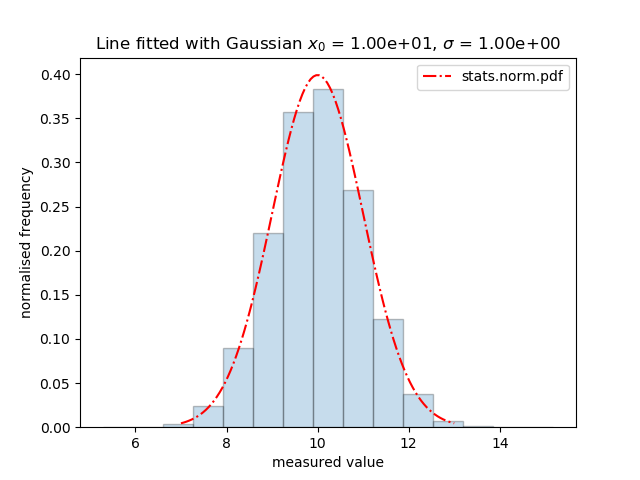

Number of points: 1000000 
Number of bins: 15 
Mean: 10.000386622837107 
Standard Deviation: 0.9996051005443496


In [16]:
npoints2 = 1000000 # data points from 10000 to 1000000

new_data2 = np.random.normal(mean_x,stdev,npoints2) # new data generated for new npoints

x_bar2, sd2 = stats.norm.fit(new_data2) # new mean and standard deviation

y_values2 = stats.norm.pdf(x, x_bar2, sd2)

plt.figure()
plt.hist(new_data2, bins=15, density=True,alpha=0.25,edgecolor='k') # plots new data with new number of points
plt.plot(x,y_values2,'r-.', label="stats.norm.pdf") # plots new Gaussian line with new y values
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
plt.title('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x_bar2, sd2))
print("Number of points:", npoints2,"\nNumber of bins:", 15,"\nMean:", x_bar2,"\nStandard Deviation:", sd2)

In the code cell above the number of data points has been increased from 10,000 to 1,000,000. Compared to the previous plot, the histogram fits the Gaussian much more accurately. Therefore increasing the number of data points increases the accuracy of the data points with the Gaussian line.

Increasing the number of points to 1,000,000 resulted in a more accurate mean and standard deviation as it is much closer to the expected values than the original number of points and the decreased number of points. Therefore I deduce that as the number of points tends to infinity, the mean and standard deviation would tend to 10 and 1 respectively.

## Number of Bins Decreased To 5 ##

<IPython.core.display.Javascript object>


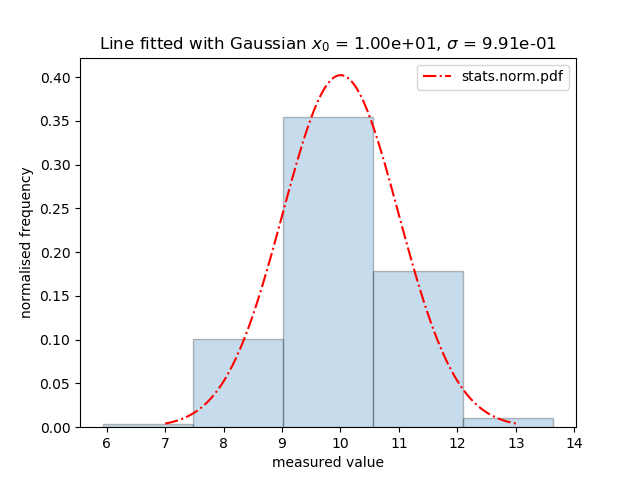

Number of points: 10000 
Number of bins: 5 
Mean: 10.002024824394752 
Standard Deviation: 0.9913551629292905


In [17]:
plt.figure()
plt.hist(new_data, bins=5, density=True,alpha=0.25,edgecolor='k') # histogram with decreased number of bins
plt.plot(x,y_values,'r-.', label="stats.norm.pdf") # plots original Gaussian line as y values unchanged
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
plt.title('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x_bar, sd))
print("Number of points:", npoints,"\nNumber of bins:", 5,"\nMean:", x_bar,"\nStandard Deviation:", sd)

In the code cell above, the bins was changed from the default of 15 to 5. As you can see, the new histrogram with less bins still fits the fitted Gaussian line, however the precision of the data is lower since each bin of the histogram has a greater number of points representing it. This means that the histogram is less likely to accurately represent the data generated.

## Number of Bins Increased To 60 ##

<IPython.core.display.Javascript object>


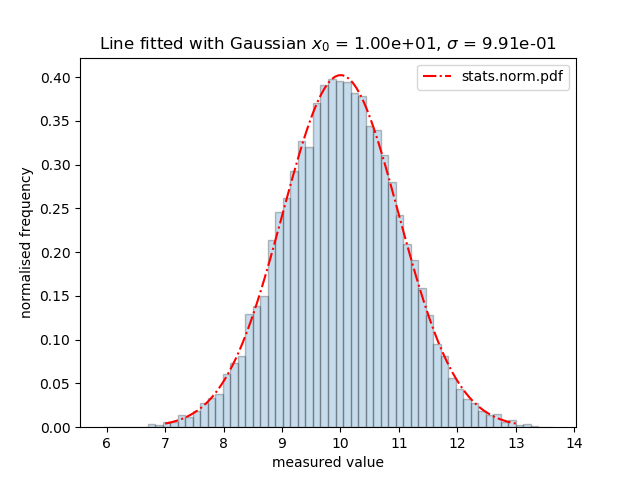

Number of points: 10000 
Number of bins: 60 
Mean: 10.002024824394752 
Standard Deviation: 0.9913551629292905


In [18]:
plt.figure()
plt.hist(new_data, bins=60, density=True,alpha=0.25,edgecolor='k') # histogram with decreased number of bins
plt.plot(x,y_values,'r-.', label="stats.norm.pdf") # plots original Gaussian line as y values unchanged
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
plt.title('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x_bar, sd))
print("Number of points:", npoints,"\nNumber of bins:", 60,"\nMean:", x_bar,"\nStandard Deviation:", sd)

In the code cell above I have changed the bins from the default of 15 to 60. As you can see, the histogram fits the plotted Gaussian line very well. The increase in the bins means that each bin, more accurately represents the data within it since it contains data from a smaller range of the measured values.

### When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-info"> **Residual**: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 